In [ ]:
# Title of Project

# Bank Customer Churn Model

**OBJECTIVE**
#### The objective of this project is to predict customer churn in a bank using machine learning techniques."

Data Source

### YBI Foundation
    https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv

Import Library

### import pandas as pd
### import numpy as np
### import matplotlib.pyplot as plt
### import seaborn as sns
### from sklearn.model_selection import train_test_split
### from sklearn.preprocessing import StandardScaler
### from sklearn.svm import SVC
### from sklearn.metrics import classification_report, confusion_matrix
### from sklearn.model_selection import GridSearchCV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [134]:
df=pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv")

# Describe Data

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
df.isnull().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

In [99]:
df.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Zero Balance
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,1.253700,0.454300,38.921800,5.012800,76485.889288,0.491600,0.70550,0.515100,100090.239881,0.203700,0.638300
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.499954,0.45584,0.499797,57510.492818,0.402769,0.480517
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.00000,0.000000,11.580000,0.000000,0.000000
25%,584.000000,1.000000,0.000000,32.000000,3.000000,0.000000,0.000000,0.00000,0.000000,51002.110000,0.000000,0.000000
50%,652.000000,2.000000,0.000000,37.000000,5.000000,97198.540000,0.000000,1.00000,1.000000,100193.915000,0.000000,1.000000
75%,718.000000,2.000000,1.000000,44.000000,7.000000,127644.240000,1.000000,1.00000,1.000000,149388.247500,0.000000,1.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,1.000000,1.00000,1.000000,199992.480000,1.000000,1.000000


**Data Visualization**

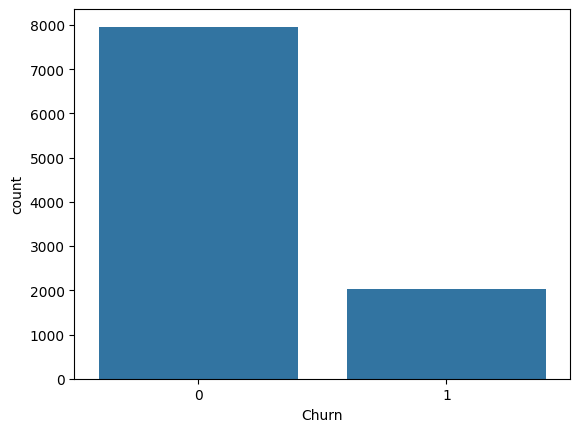

In [100]:
sns.countplot(x='Churn', data=df)
plt.show()

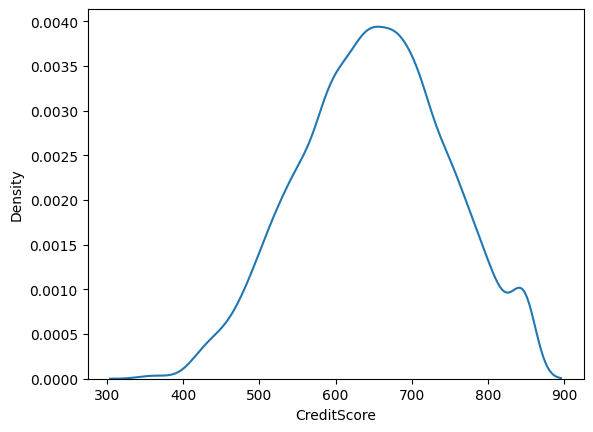

In [126]:
sns.kdeplot(x='CreditScore',data=df)
plt.show()

In [133]:
df.groupby("Gender")[["Age","CreditScore"]].agg(('max','min'))

Age     CreditScore     
       max min         max  min
Gender                         
0       92  18         850  350
1       85  18         850  350

<Axes: xlabel='Geography', ylabel='count'>

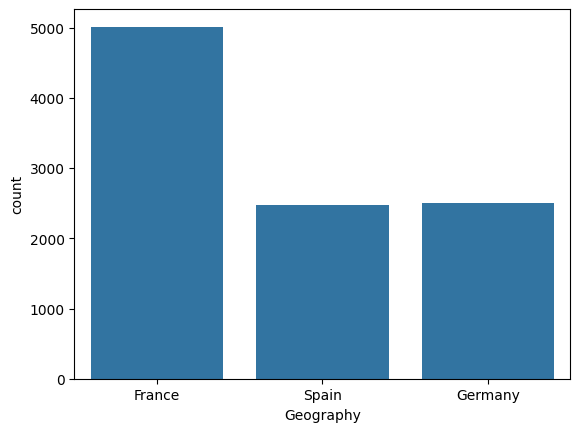

In [137]:
sns.countplot(x="Geography",data=df)


# Data Preprocessing
### Clean and preprocess the data to prepare it for modeling

In [6]:
df.duplicated("CustomerId").sum()

0

In [7]:
df.set_index('CustomerId',inplace=True)

In [8]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Encoding**

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [11]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace = True)

In [13]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [14]:
df['Num Of Products'].unique()

array([1, 3, 2, 4])

In [15]:
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace=True)

In [16]:
df["Has Credit Card"].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [17]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [18]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [19]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)


<Axes: >

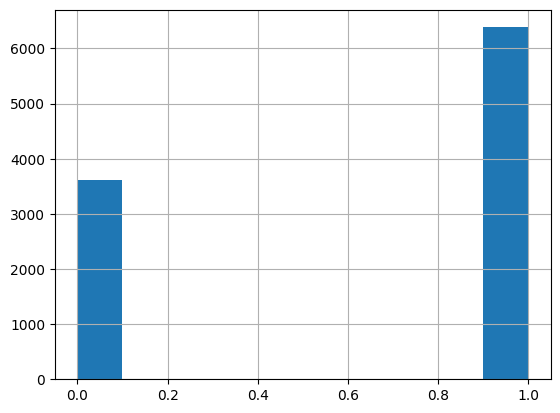

In [20]:
df['Zero Balance'].hist()

In [21]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [22]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

# Target Variable (y) and Feature Variables (X)

### Separate the target variable (y) and feature variables (X).

**Label and Features**

In [23]:
x=df.drop(['Surname','Churn'],axis=1)

In [24]:
y=df['Churn']

In [25]:
x.shape,y.shape

((10000, 11), (10000,))

In [26]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

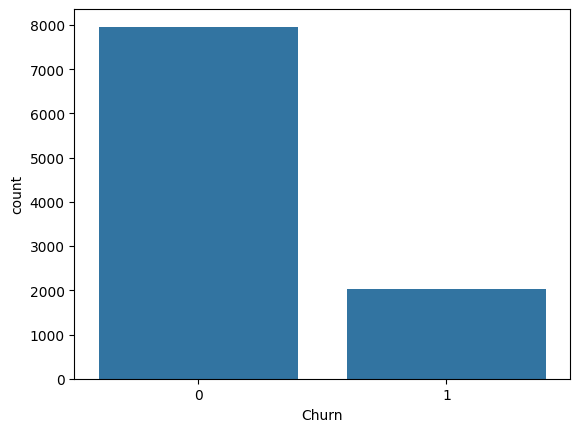

In [27]:
sns.countplot(x='Churn',data=df)

**Random Under Sampling **

In [28]:
from imblearn.under_sampling import RandomUnderSampler

In [29]:
rus = RandomUnderSampler(random_state=2529)

In [30]:
x_rus,y_rus= rus.fit_resample(x,y)

In [31]:
x_rus.shape,y_rus.shape,x.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [32]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [33]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

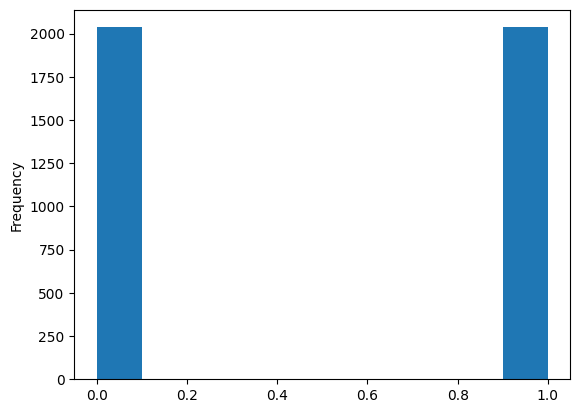

In [34]:
y_rus.plot(kind='hist')

**Random Over Sampling **

In [35]:
from imblearn.over_sampling import RandomOverSampler

In [36]:
ros = RandomOverSampler(random_state=2529)

In [37]:
x_ros,y_ros = ros.fit_resample(x,y)

In [38]:
x_ros.shape,y_ros.shape,x.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [39]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [40]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

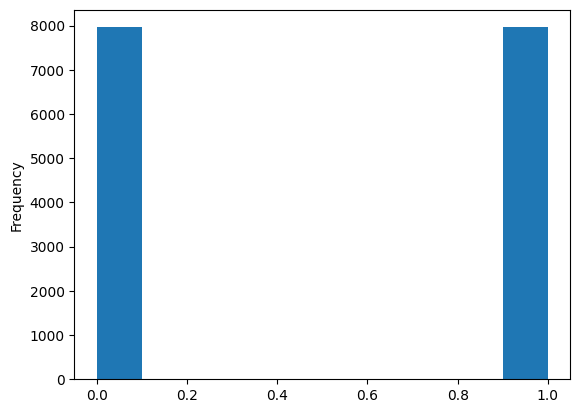

In [41]:
y_ros.plot(kind="hist")

# Train Test Split

### Split the data into training and testing sets.

In [42]:
from sklearn.model_selection import train_test_split

**split original data**

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2529)

In [44]:

print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (7000, 11)
Shape of y_train: (7000,)
Shape of x_test: (3000, 11)
Shape of y_test: (3000,)


**Split Random Under Sample data**

In [45]:
x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size=0.3, random_state=2529)

In [46]:
print("\nShape of x_train_rus:", x_train_rus.shape)
print("Shape of y_train_rus:", y_train_rus.shape)
print("Shape of x_test_rus:", x_test_rus.shape)
print("Shape of y_test_rus:", y_test_rus.shape)


Shape of x_train_rus: (2851, 11)
Shape of y_train_rus: (2851,)
Shape of x_test_rus: (1223, 11)
Shape of y_test_rus: (1223,)


**Split random over sample data**

In [47]:
x_train_ros,x_test_ros,y_train_ros,y_test_ros = train_test_split(x_ros,y_ros,test_size=0.3,random_state=2529)

In [48]:
print("\nShape of x_train_rus:", x_train_ros.shape)
print("Shape of y_train_rus:", y_train_ros.shape)
print("Shape of x_test_rus:", x_test_ros.shape)
print("Shape of y_test_rus:", y_test_ros.shape)


Shape of x_train_rus: (11148, 11)
Shape of y_train_rus: (11148,)
Shape of x_test_rus: (4778, 11)
Shape of y_test_rus: (4778,)


**Standardize original data**

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc = StandardScaler()

standardize original data

In [51]:
x_train[["CreditScore","Age","Tenure","Balance","Estimated Salary"]]=sc.fit_transform(x_train[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])

In [52]:
x_test[["CreditScore","Age","Tenure","Balance","Estimated Salary"]]=sc.fit_transform(x_test[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])

Standardize random under sample data

In [53]:
x_train_rus[["CreditScore","Age","Tenure","Balance","Estimated Salary"]]=sc.fit_transform(x_train_rus[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])

In [54]:
x_test_rus[["CreditScore","Age","Tenure","Balance","Estimated Salary"]]=sc.fit_transform(x_test_rus[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])

standardize random over sample data

In [55]:
x_train_ros[["CreditScore","Age","Tenure","Balance","Estimated Salary"]]=sc.fit_transform(x_train_ros[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])

In [56]:
x_test_ros[["CreditScore","Age","Tenure","Balance","Estimated Salary"]]=sc.fit_transform(x_test_ros[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])

# Modeling

### machine learning model and train it on the training data.

**Support Vector Machine Classifier**

1. original data

In [57]:
from sklearn.svm import SVC

In [58]:
svc = SVC()

In [59]:
svc.fit(x_train,y_train)

SVC()

In [60]:
y_pred = svc.predict(x_test)

2. random under sample data

In [61]:
svc.fit(x_train_rus,y_train_rus)

SVC()

In [62]:
y_pred_rus = svc.predict(x_test_rus)

3. random over sample data

In [63]:
svc.fit(x_train_ros,y_train_ros)

SVC()

In [64]:
y_pred_ros = svc.predict(x_test_ros)

**Model Accuracy**

In [65]:
from sklearn.metrics import confusion_matrix, classification_report

In [66]:
confusion_matrix(y_test,y_pred)

array([[2381,   33],
       [ 436,  150]])

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



**Hyperparamtic tuning**

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [70]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

# Model Evaluation
### Evaluate the performance of the model on the testing data.

In [71]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [72]:
grid_predictions = grid.predict(x_test)

In [73]:
confusion_matrix(y_test,grid_predictions)

array([[2159,  255],
       [ 343,  243]])

In [74]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



**Model accuracy random under sampling**

In [75]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[470, 157],
       [174, 422]])

In [77]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



**Hyperparameter Tunning**

In [78]:
param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [79]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_rus.fit(x_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [80]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [86]:
grid_predictions_rus = grid_rus.predict(x_test_rus)

In [87]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[476, 151],
       [172, 424]])

In [88]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



**model accuracy random over sampling**

In [89]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[1823,  556],
       [ 626, 1773]])

In [90]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



**Hyperparameter Tunning**

In [91]:
param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [92]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_ros.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.7s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.9s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [93]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [96]:
grid_predictions_ros = grid_ros.predict(x_test_ros)

In [97]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2047,  332],
       [  68, 2331]])

In [98]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



Prediction

Based on the evaluation metrics provided for each model

1) Original Data Model (No Sampling)

Accuracy: 80%
Precision (class 1): 49%
Recall (class 1): 41%
F1-score (class 1): 45%

2) Random Under Sampling Model

Accuracy: 74%
Precision (class 1): 74%
Recall (class 1): 71%
F1-score (class 1): 72%


3) Random Over Sampling Model

Accuracy: 92%
Precision (class 1): 88%
Recall (class 1): 97%
F1-score (class 1): 92%



Based on the evaluation metrics and considering the trade-offs, the Random Over Sampling Model seems to be the best choice for prediction. It has the highest accuracy and performs well in terms of precision, recall, and F1-score for predicting churned customers.

Explaination

Precision:
The proportion of true positive predictions (correctly predicted churn) out of all positive predictions (both true positive and false positive).

Recall:
The proportion of true positive predictions out of all actual positives (both true positives and false negatives).

F1-score:
The harmonic mean of precision and recall, providing a balance between the two metrics.

Support:
 The number of samples in each class (0: not churned, 1: churned)

Accuracy:
The proportion of correctly predicted samples out of all samples.

Hyperparameter tuning aims to find the optimal hyperparameters for a machine learning model, which can lead to improved performance. and i have performed hyperparameter tuning for random over-sampling and obtained the best hyperparameters, we  can use those hyperparameters to train a new model and make predictions.

The model has a high precision for both classes (0 and 1), indicating that when it predicts a class, it is usually correct.
The recall is also high for both classes, suggesting that the model captures most of the actual positive samples.
The F1-score, which considers both precision and recall, is also high for both classes.
The accuracy of the model is 92%, indicating that it correctly predicts the churn status for 92% of the samples in the test dataset.

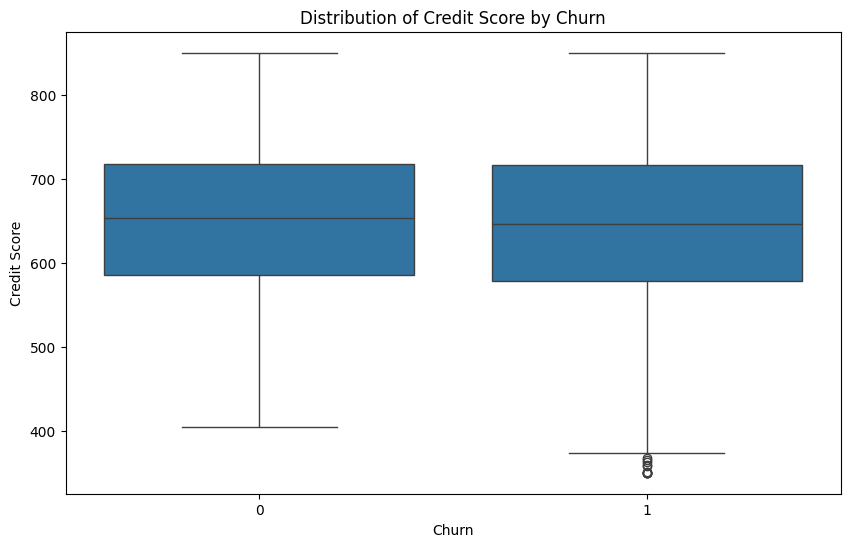

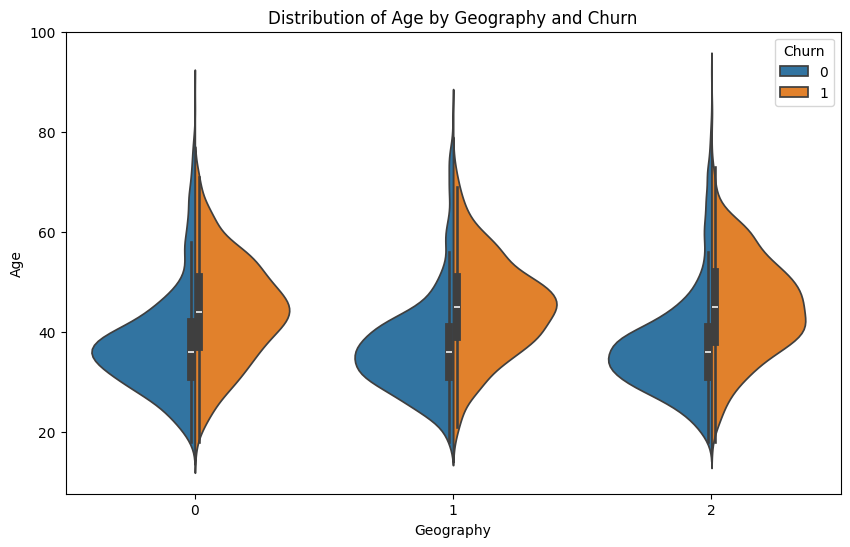

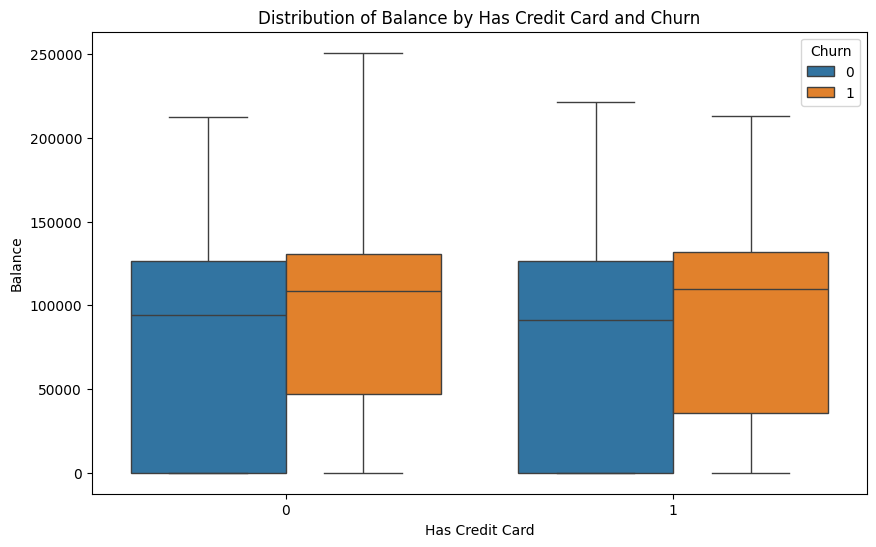

In [121]:


# Box plot for 'CreditScore' across different categories of 'Churn'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='CreditScore', data=df)
plt.title('Distribution of Credit Score by Churn')
plt.xlabel('Churn')
plt.ylabel('Credit Score')
plt.show()

# Violin plot for 'Age' across different categories of 'Geography'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Geography', y='Age', hue='Churn', data=df, split=True)
plt.title('Distribution of Age by Geography and Churn')
plt.xlabel('Geography')
plt.ylabel('Age')
plt.show()

# Box plot for 'Balance' across different categories of 'Has Credit Card'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Has Credit Card', y='Balance', hue='Churn', data=df)
plt.title('Distribution of Balance by Has Credit Card and Churn')
plt.xlabel('Has Credit Card')
plt.ylabel('Balance')
plt.show()


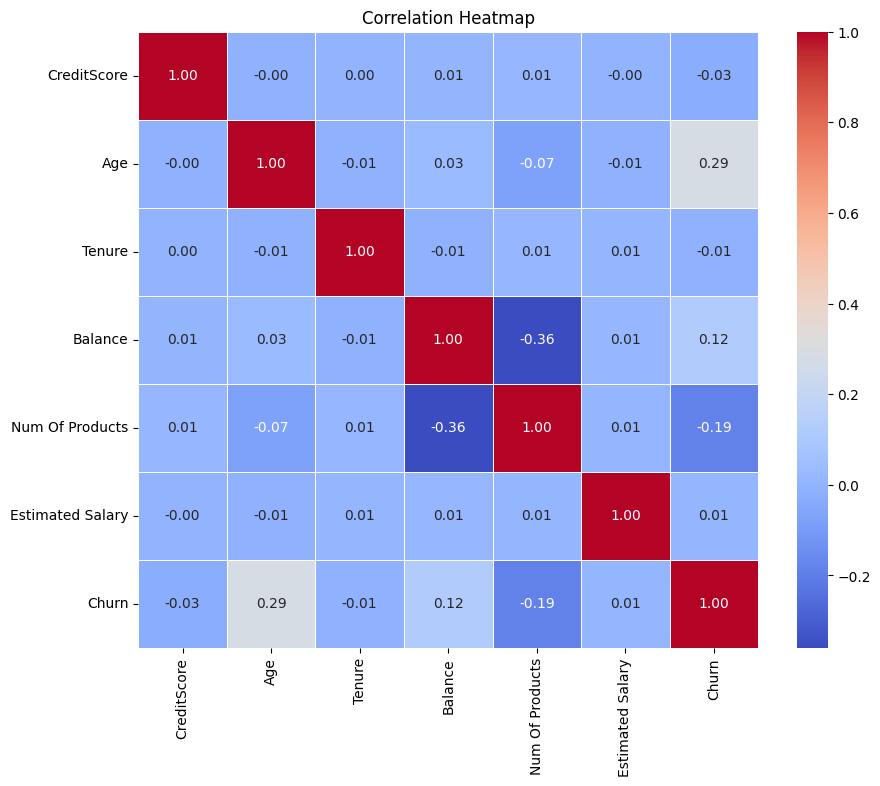

In [122]:

# Calculate the correlation matrix
correlation_matrix = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'Num Of Products', 'Estimated Salary', 'Churn']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Overall, the strongest correlation with churn is observed for 'Age' and 'Num Of Products', indicating that these features may be more influential in predicting churn compared to others